In [13]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLXGJJG/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLXGJJG/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLXGJJG/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']

In [5]:
training_sentences = []
training_lables = []

testing_sentences = []
testing_lables = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_lables.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_lables.append(l.numpy())

In [6]:
training_lables_final = np.array(training_lables)
testing_lables_final = np.array(testing_lables)

In [8]:
print(training_lables_final.shape)
print(testing_lables_final.shape)

(25000,)
(25000,)


In [9]:
#Hyperparameters
vocab_size=10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_type="<OOV>"

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_type)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [16]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_paded = pad_sequences(testing_sequences, maxlen=max_length)

In [23]:
model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.GlobalAveragePooling1D())

model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 15
h = model.fit(padded, training_lables_final, epochs=num_epochs, validation_data=(testing_paded, testing_lables_final))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 4s 162us/step - loss: 0.5646 - accuracy: 0.7097 - val_loss: 0.3659 - val_accuracy: 0.8429
Epoch 2/15
25000/25000 [==============================] - 4s 156us/step - loss: 0.3160 - accuracy: 0.8677 - val_loss: 0.3322 - val_accuracy: 0.8570
Epoch 3/15
25000/25000 [==============================] - 4s 157us/step - loss: 0.2574 - accuracy: 0.8978 - val_loss: 0.3413 - val_accuracy: 0.8560
Epoch 4/15
25000/25000 [==============================] - 4s 156us/step - loss: 0.2231 - accuracy: 0.9160 - val_loss: 0.3630 - val_accuracy: 0.8498
Epoch 5/15
25000/25000 [==============================] - 4s 155us/step - loss: 0.1976 - accuracy: 0.9274 - val_loss: 0.3909 - val_accuracy: 0.8426
Epoch 6/15
25000/25000 [==============================] - 4s 156us/step - loss: 0.1755 - accuracy: 0.9385 - val_loss: 0.4231 - val_accuracy: 0.8386
Epoch 7/15
25000/25000 [==============================] - 4s 1

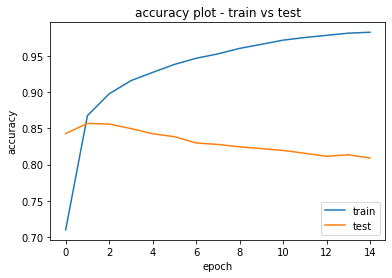

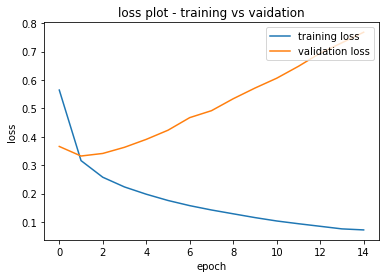

In [30]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [31]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [34]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b'this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received '
b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'


In [35]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [36]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 68, 105, 12, 7, 491, 1216]]
